# 第30课 纽约Uber数据分析图形化和K-means计算热点

Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode



In [3]:
#conda install -c conda-forge folium

In [120]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium #visualize map
from sklearn.cluster import KMeans #k-means clustering
from yellowbrick.cluster import KElbowVisualizer #Elbow visualize K-means

In [121]:
#Date/Time : The date and time of the Uber pickup
#Lat : The latitude of the Uber pickup
#Lon : The longitude of the Uber pickup
#Base : The TLC base company code affiliated with the Uber pickup
'''
B02512 : Unter
B02598 : Hinter
B02617 : Weiter
B02682 : Schmecken
B02764 : Danach-NY
B02765 : Grun
B02835 : Dreist
B02836 : Drinnen
'''

df_ori = pd.read_csv('Lesson30-uber-raw-data-aug14.csv') #from https://www.kaggle.com/
df_ori

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


In [122]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  829275 non-null  object 
 1   Lat        829275 non-null  float64
 2   Lon        829275 non-null  float64
 3   Base       829275 non-null  object 
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


In [125]:
df_ori['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

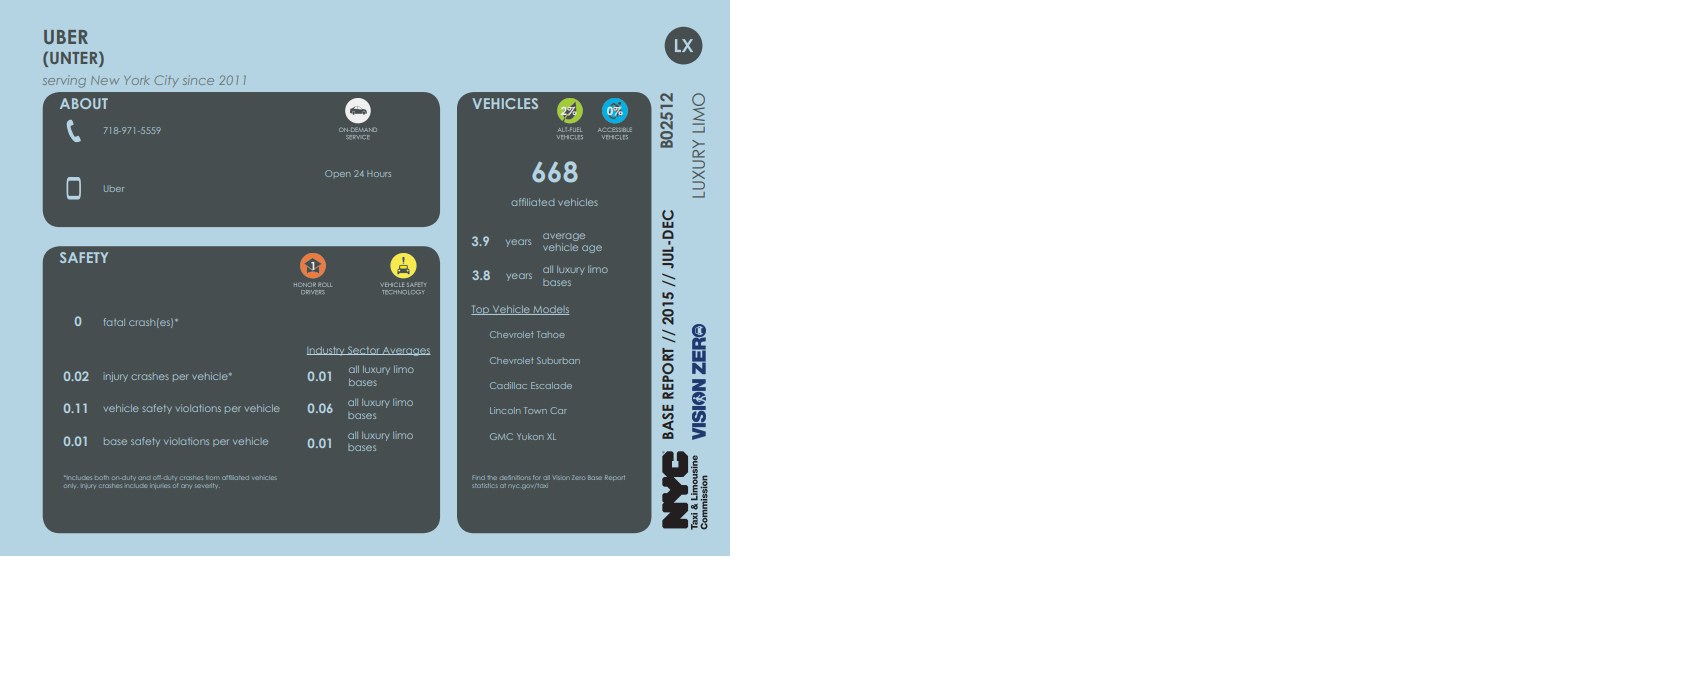

In [67]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson30-B02512.png')

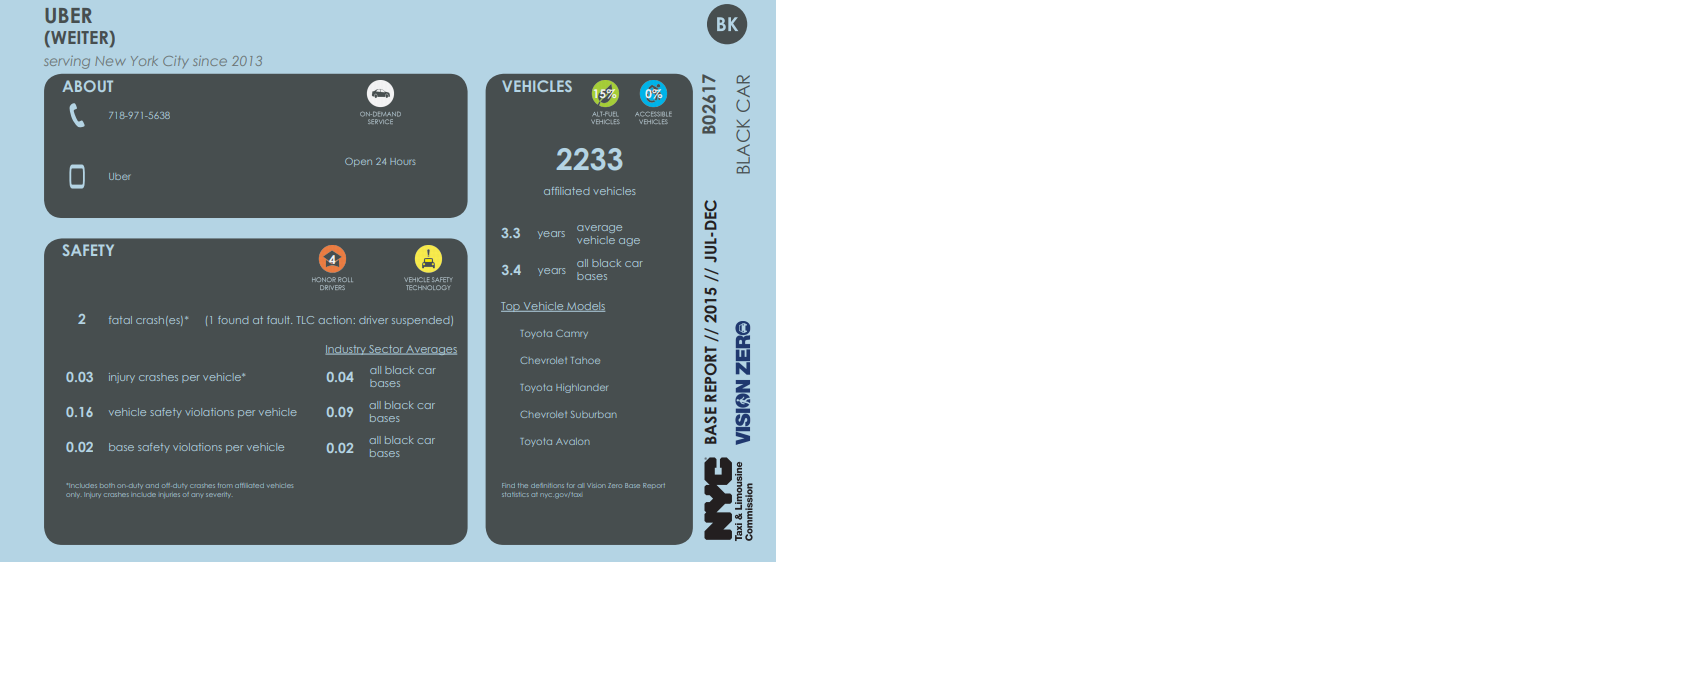

In [126]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson30-B02617.png')

In [127]:
clus_k_ori = df_ori[['Lat', 'Lon']]
clus_k_ori.dtypes

Lat    float64
Lon    float64
dtype: object

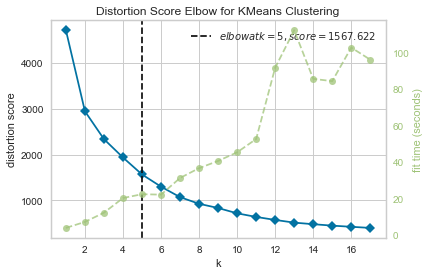

875.0646760463715

In [70]:
start = time.time()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model_ori = KMeans()
visualizer = KElbowVisualizer(model_ori, k = (1, 18)) #k = 1 to 17
visualizer.fit(clus_k_ori)
visualizer.show()
time2=time

end = time.time()
end-start

In [135]:
kmeans_ori = KMeans(n_clusters = 5, random_state = 0) #k = 5
kmeans_ori.fit(clus_k_ori)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [137]:
centroids_k_ori = kmeans_ori.cluster_centers_
centroids_k_ori

array([[ 40.75813164, -73.98089683],
       [ 40.70819256, -73.98534917],
       [ 40.66869811, -73.75817069],
       [ 40.79725343, -73.88727189],
       [ 40.6961372 , -74.19972869]])

In [138]:
clocation_k_ori = pd.DataFrame(centroids_k_ori, columns = ['Latitude', 'Longitude'])

In [139]:
clocation_k_ori

,Latitude,Longitude
0,40.758132,-73.980897
1,40.708193,-73.985349
2,40.668698,-73.758171
3,40.797253,-73.887272
4,40.696137,-74.199729


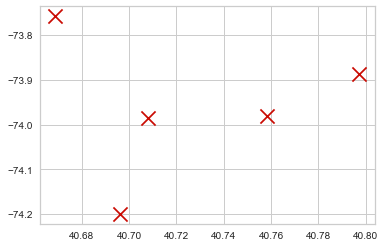

In [140]:
plt.scatter(clocation_k_ori['Latitude'], clocation_k_ori['Longitude'], marker = "x", color = 'r', s = 200)

In [141]:
clocation_k_ori.values.tolist()

[[40.75813163909047, -73.98089683164005],
 [40.70819255961724, -73.98534916648876],
 [40.66869811488646, -73.75817068846192],
 [40.79725342625452, -73.88727189048329],
 [40.69613720447469, -74.19972869334563]]

In [142]:
centroid_k_ori[0]

[40.75813163909047, -73.98089683164005]

In [143]:
centroid_k_ori = clocation_k_ori.values.tolist()

map_k_ori = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
for point in range(0, len(centroid_k_ori)):
    folium.Marker(centroid_k_ori[point], popup = centroid_k_ori[point]).add_to(map_k_ori)

map_k_ori


In [144]:
label_k_ori = kmeans_ori.labels_
label_k_ori

array([0, 1, 1, ..., 0, 0, 1])

In [145]:
df_new_k = df_ori.copy()
df_new_k['Clusters'] = label_k_ori
df_new_k

,Date/Time,Lat,Lon,Base,Clusters
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512,0
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512,1
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512,1
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512,0
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512,1
...,...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764,0
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764,0
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764,0
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764,0


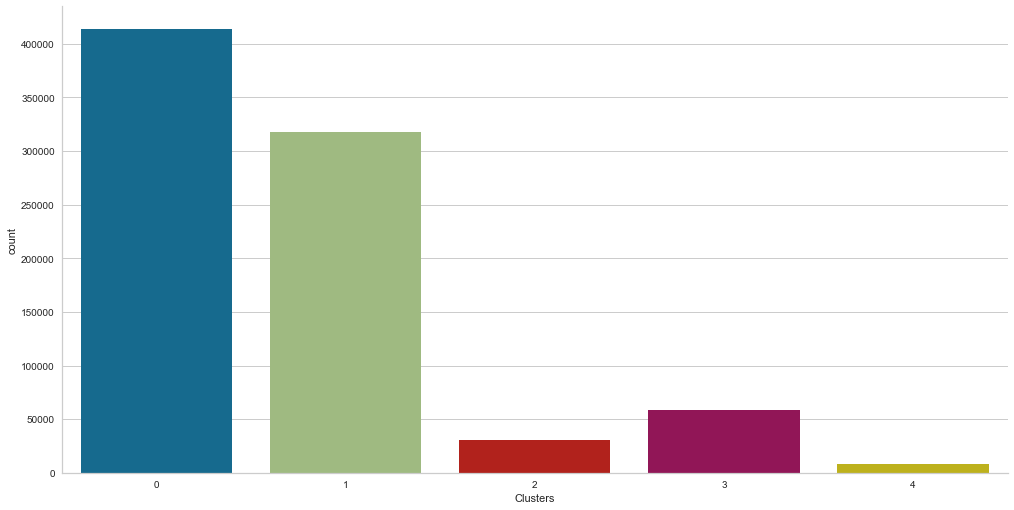

In [146]:
sb.catplot(data = df_new_k, x = "Clusters", kind = "count", height = 7, aspect = 2)

In [147]:
count_3 = 0
count_0 = 0
for value in df_new_k['Clusters']:
    if value == 3:
        count_3 += 1
    if value == 0:
        count_0 += 1
print(count_0, count_3)

414161 58398


In [148]:
new_location_ori = [(40.76, -73.99)]
kmeans_ori.predict(new_location_ori)

array([0])

In [89]:
kmeans_ori.predict(new_location_ori)

array([0])

In [149]:
new_location_ori = [40.76, -74.1]

map_k_ori = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
folium.Marker(new_location_ori, popup = new_location_ori).add_to(map_k_ori)
map_k_ori

In [90]:
df_ori

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


In [150]:
df_ori.columns = ['timestamp', 'lat', 'lon', 'base']
df_ori

,timestamp,lat,lon,base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


In [153]:
import time
ti = time.time()

df_ori['timestamp'] = pd.to_datetime(df_ori['timestamp'])

tf = time.time()
print(tf-ti,' seconds.')

225.9326832294464  seconds.


In [154]:
df_ori

,timestamp,lat,lon,base
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764
829271,2014-08-31 23:55:00,40.7552,-73.9753,B02764
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764


In [155]:
df_ori['weekday'] = df_ori.timestamp.dt.weekday
df_ori['month'] = df_ori.timestamp.dt.month
df_ori['day'] = df_ori.timestamp.dt.day
df_ori['hour'] = df_ori.timestamp.dt.hour
df_ori['minute'] = df_ori.timestamp.dt.minute

In [156]:
df_ori

,timestamp,lat,lon,base,weekday,month,day,hour,minute
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,4,8,1,0,3
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,4,8,1,0,9
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,4,8,1,0,12
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,4,8,1,0,12
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,4,8,1,0,12
...,...,...,...,...,...,...,...,...,...
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764,6,8,31,23,55
829271,2014-08-31 23:55:00,40.7552,-73.9753,B02764,6,8,31,23,55
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764,6,8,31,23,55
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764,6,8,31,23,59


In [157]:
## Hourly Ride Data
## groupby operation
hourly_ride_data = df_ori.groupby(['day','hour','weekday'])['timestamp'].count()

## reset index
hourly_ride_data = hourly_ride_data.reset_index()

## rename column
hourly_ride_data = hourly_ride_data.rename(columns = {'timestamp':'ride_count'})

## ocular analysis
hourly_ride_data

,day,hour,weekday,ride_count
0,1,0,4,734
1,1,1,4,451
2,1,2,4,289
3,1,3,4,318
4,1,4,4,412
...,...,...,...,...
739,31,19,6,1352
740,31,20,6,1260
741,31,21,6,1430
742,31,22,6,1352


In [158]:
## Weekday Hourly Averages
## groupby operation
weekday_hourly_avg = hourly_ride_data.groupby(['weekday','hour'])['ride_count'].mean()

## reset index
weekday_hourly_avg = weekday_hourly_avg.reset_index()

## rename column
weekday_hourly_avg = weekday_hourly_avg.rename(columns = {'ride_count':'average_rides'})

## sort by categorical index
weekday_hourly_avg = weekday_hourly_avg.sort_index()

## ocular analysis
weekday_hourly_avg

,weekday,hour,average_rides
0,0,0,273.5
1,0,1,171.0
2,0,2,140.0
3,0,3,296.5
4,0,4,459.0
...,...,...,...
163,6,19,1239.0
164,6,20,1198.0
165,6,21,1131.8
166,6,22,967.8


In [159]:
##Define Color Palette
tableau_color_blind = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]

for i in range(len(tableau_color_blind)):  
    r, g, b = tableau_color_blind[i]  
    tableau_color_blind[i] = (r / 255., g / 255., b / 255.)

Text(0.5, 0, 'Hour')

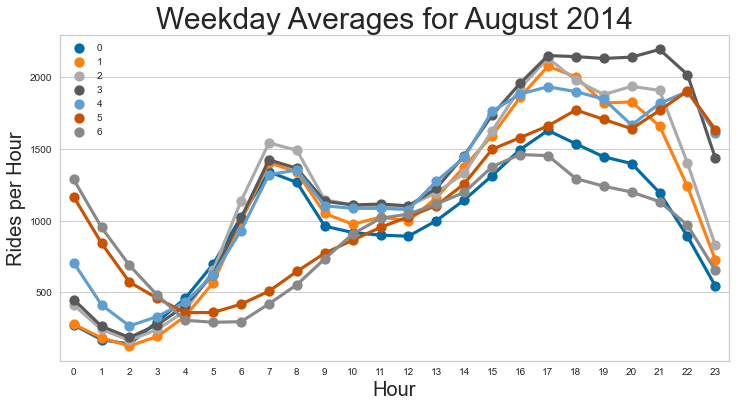

In [160]:
## create figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

## set palette   
current_palette = sns.color_palette(tableau_color_blind)

## plot data
sns.pointplot(ax=ax, x='hour',y='average_rides',hue='weekday', 
              palette = current_palette, data = weekday_hourly_avg)

## clean up the legend
l = ax.legend()
l.set_title('')

## format plot labels
ax.set_title('Weekday Averages for August 2014', fontsize=30)
ax.set_ylabel('Rides per Hour', fontsize=20)
ax.set_xlabel('Hour', fontsize=20)

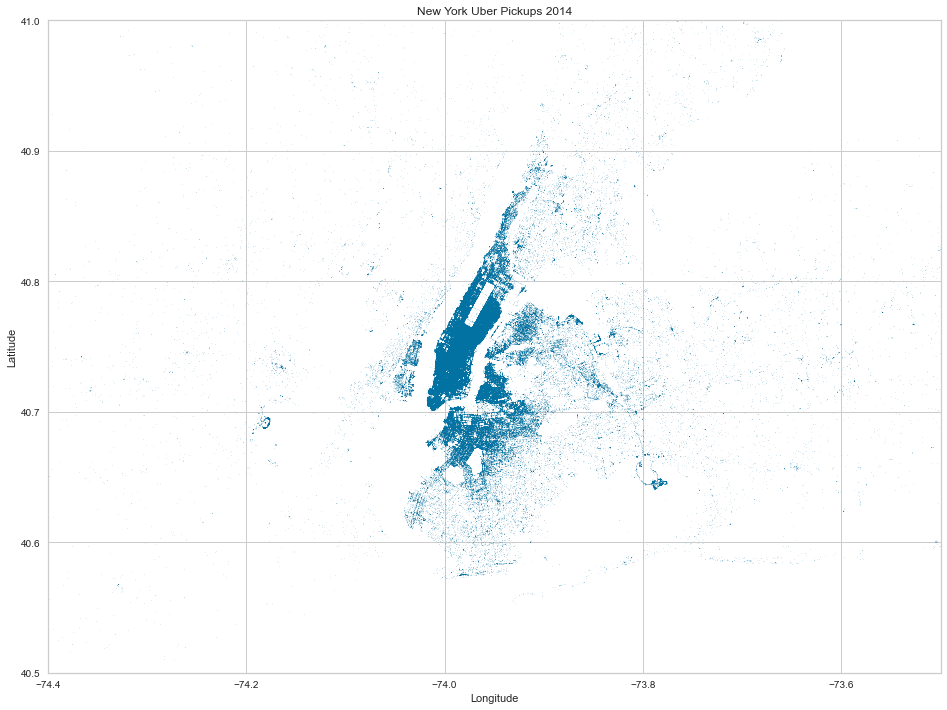

In [161]:
%matplotlib inline

plt.figure(figsize=(16, 12))

plt.plot(df_ori.lon, df_ori.lat, '.', ms=.8, alpha=.5)

plt.ylim(bottom=40.5,top=41)
plt.xlim(left=-74.4,right=-73.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York Uber Pickups 2014')

plt.show()

In [119]:
from folium.plugins import HeatMap

lat_lon = df_ori[["lat", "lon"]].values[:10000]
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
#A heatmap can be plotted like so... the radius argument controls the radius of each point within the map
#You can zoom in on this map to see more specific areas, or out to see more general
HeatMap(lat_lon, fradius=13).add_to(uber_map)
uber_map